# Exploratory Data Analysis (EDA)

In [ ]:
# Load libraries


# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset


In [ ]:
# Summary statistics of numerical variables


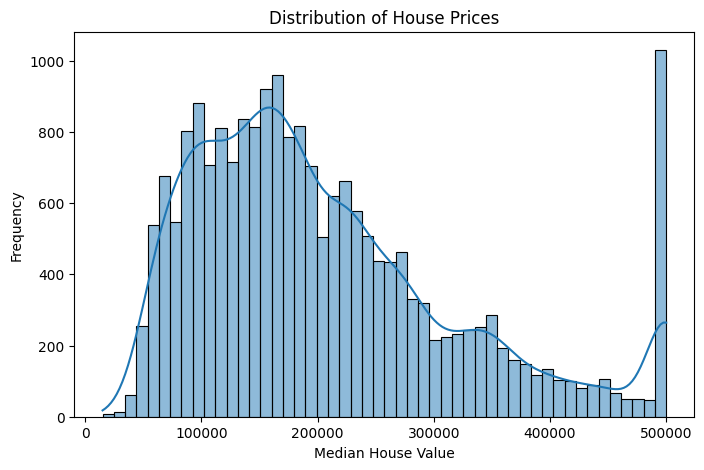

In [3]:
# Plot distribution of house prices (the target variable)


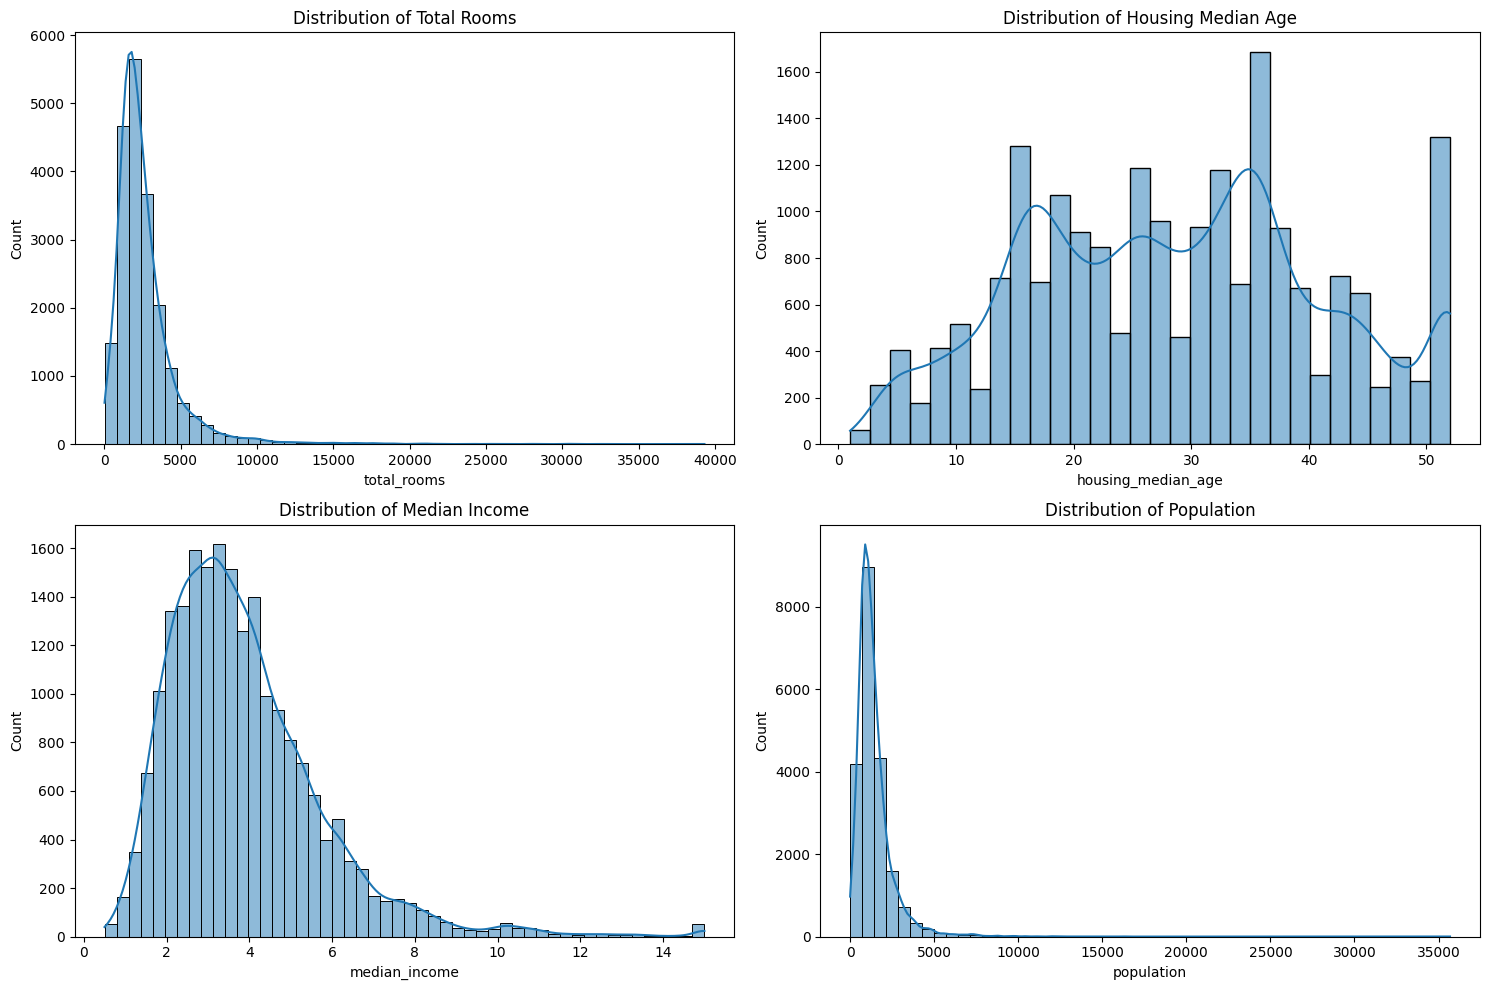

In [4]:
# Create histograms for selected numerical variables (Rooms, Median Age, Median Income, Population)


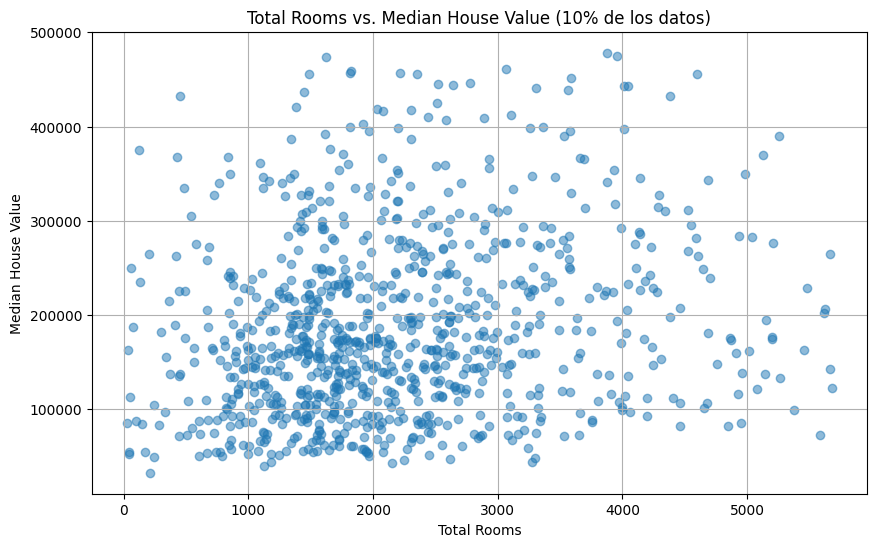

In [5]:
# Scatter plot


# Calcula el IQR para 'total_rooms'


# Calcula el IQR para 'median_house_value'


# Define los límites para considerar outliers

# Filtra el DataFrame para eliminar outliers


# Toma una muestra del 10% de los datos

# Scatter plot (Total Rooms vs Median House Value)


<ipython-input-6-4d0195e8b7c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


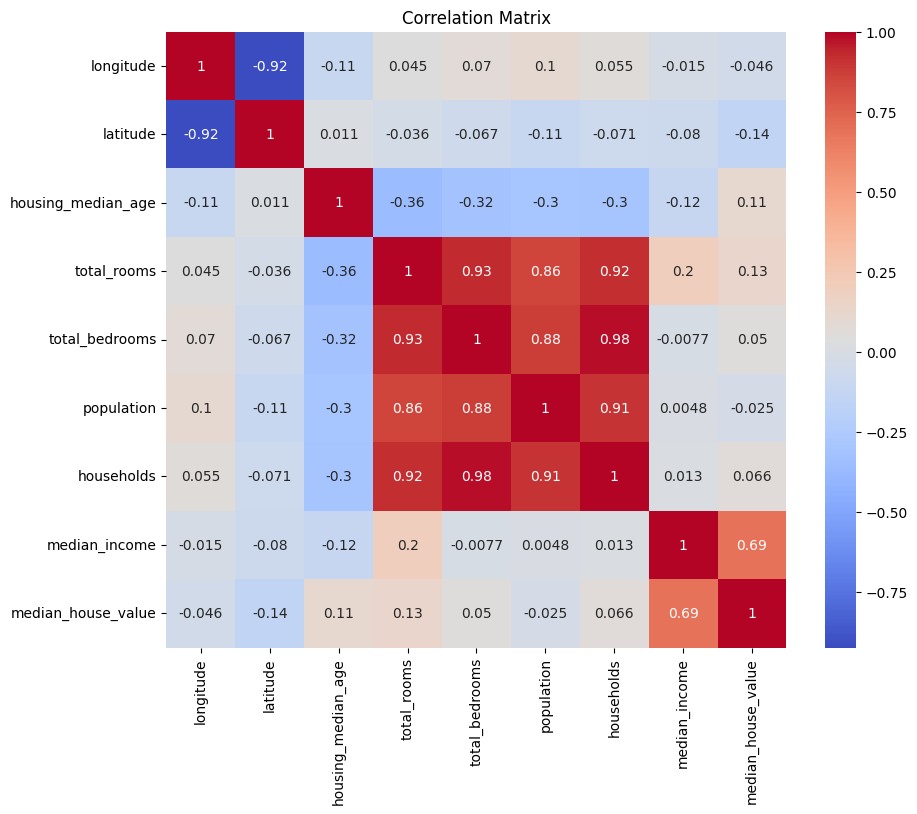

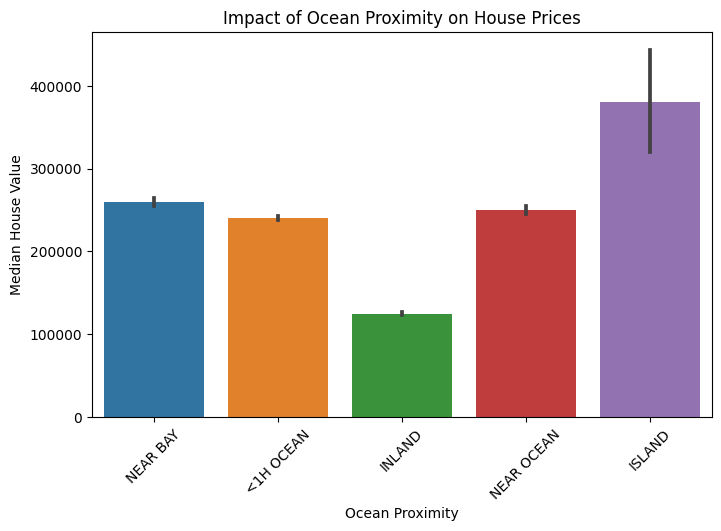

In [6]:
# Correlation matrix to identify influential variables


# Bar chart to visualize the impact of ocean proximity on house prices


# Filter Methods

In [7]:
# Import libraries

# Load the housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Calculate the correlation matrix between numerical variables


# Extract the correlations between numerical predictors and the target variable (median_house_value)


# Sort the correlations in descending order to identify influential variables


# Display the influential variables


median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64


<ipython-input-8-a3b0d88934b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


In [9]:
# Set a threshold for correlation coefficient (adjust as needed)


# Select influential variables based on the threshold


# Display the selected influential variables


Index(['median_house_value', 'median_income'], dtype='object')


# Chi-Square Test

In [13]:
# Import libraries


# Create a sample dataset (you can replace this with your dataset)
data = {
    'Car_Model': ['Sedan', 'SUV', 'Sedan', 'SUV', 'Hatchback', 'SUV', 'Sedan', 'Hatchback', 'Sedan', 'SUV'],
    'Color': ['Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Blue', 'Blue'],
    'Fuel_Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Petrol'],
    'Decision': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Display the dataset


   Car_Model Color Fuel_Type Decision
0      Sedan   Red    Petrol      Yes
1        SUV  Blue    Diesel      Yes
2      Sedan   Red    Diesel       No
3        SUV  Blue    Petrol       No
4  Hatchback   Red    Diesel      Yes
5        SUV  Blue    Petrol       No
6      Sedan   Red    Petrol       No
7  Hatchback   Red    Diesel      Yes
8      Sedan  Blue    Petrol      Yes
9        SUV  Blue    Petrol       No


In [ ]:
# Define a function to perform the chi-square test and return the p-value
def perform_chi_square_test(df, variable):
    contingency_table = pd.crosstab(df[variable], df['Decision'])
    print(contingency_table)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# List of categorical variables for testing


# Perform the chi-square test for each categorical variable
chi_square_results = {}
for variable in categorical_variables:
    p_value = perform_chi_square_test(df, variable)
    chi_square_results[variable] = p_value

# Display the p-values for each variable
print("Chi-Square Test Results:")
for variable, p_value in chi_square_results.items():
    print(f"{variable}: p-value = {p_value:.4f}")

In [15]:
# Set a significance level threshold (adjust as needed)

# Select influential variables based on the significance level

# Display the selected influential variables


Selected Influential Categorical Variables:
['Car_Model']


# Forward Selection

In [17]:
# Import libraries

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Split the dataset into features (X) and target (y)


# Initialize an empty list of selected variables


# Define the initial best accuracy as 0

# Specify the maximum number of iterations (number of variables)
max_iterations = X.shape[1]

# Create a function to train and evaluate the model
def train_and_evaluate(X, y, selected_variables):
    X_selected = X[selected_variables]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Perform forward selection
for i in range(max_iterations):
    candidate_variables = [var for var in X.columns if var not in selected_variables]
    variable_accuracies = []

    for var in candidate_variables:
        accuracy = train_and_evaluate(X, y, selected_variables + [var])
        variable_accuracies.append((var, accuracy))
        print(accuracy)

    # Sort variables by accuracy in descending order
    variable_accuracies.sort(key=lambda x: x[1], reverse=True)

    # Select the best-performing variable from candidates
    best_variable, best_accuracy_candidate = variable_accuracies[0]

    # Check if the best candidate improves model accuracy
    if best_accuracy_candidate > best_accuracy:
        selected_variables.append(best_variable)
        best_accuracy = best_accuracy_candidate
    else:
        break

# Display the selected influential variables


0.8333333333333334
0.6
1.0
1.0
1.0
1.0
1.0
Selected Influential Variables:
['petal length (cm)']


In [19]:
# Train the final model using the selected variables

# Display the final model's accuracy and selected variables



Final Model Accuracy: 1.0000
Final Selected Variables:
['petal length (cm)']


# Backward Elimination

Final Model Mean Squared Error: 2792.6282
Final Selected Variables:
{'bmi', 's3', 'sex', 's6', 's5'}


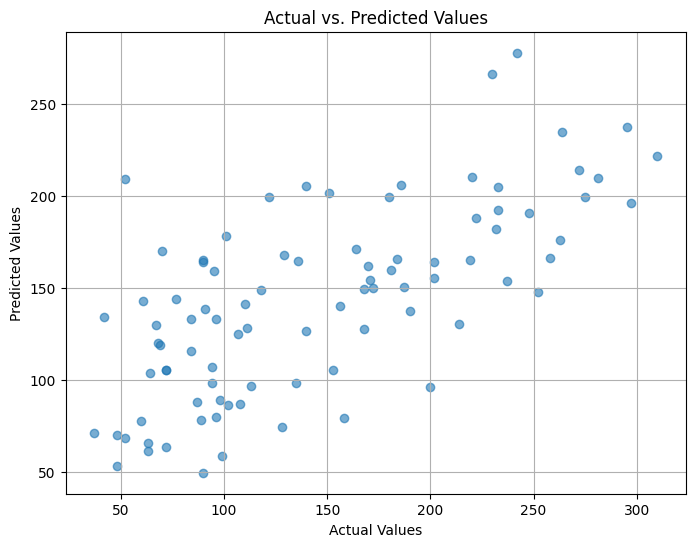

In [24]:
# Import Libraries


# Load the Diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Split the dataset into features (X) and target (y)


# Initialize a set of selected variables with all available variables


# Specify the maximum number of iterations (number of variables)


# Define the initial best mean squared error as high


# Create a function to train and evaluate the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, model, X_test, y_test

# Perform backward elimination
for i in range(max_iterations):
    variable_mses = []

    for var in selected_variables:
        current_selected = list(selected_variables - {var})
        mse, _, _, _ = train_and_evaluate(X[current_selected], y)
        variable_mses.append((var, mse))

    # Sort variables by MSE in ascending order
    variable_mses.sort(key=lambda x: x[1])

    # Select the best-performing variable from candidates
    best_variable, best_mse_candidate = variable_mses[0]

    # Check if the best candidate improves model performance
    if best_mse_candidate < best_mse:
        selected_variables.remove(best_variable)
        best_mse = best_mse_candidate
    else:
        break

# Train the final model using the selected variables
final_mse, final_model, X_test, y_test = train_and_evaluate(X[list(selected_variables)], y)

# Display the final model's mean squared error and selected variables


# Plot the relationship between actual and predicted values



# Stepwise Selection

In [ ]:
# Import libraries


# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")

# Display the first few rows of the dataset


In [17]:
# Split the dataset into features (X) and target (y)


# Initialize an empty list of selected features
selected_features = []

# Create a function to train and evaluate the model
def train_and_evaluate(X, y, selected_features):
    X_with_constant = sm.add_constant(X[selected_features])
    model = sm.OLS(y, X_with_constant).fit()
    y_pred = model.predict(X_with_constant)
    mse = mean_squared_error(y, y_pred)
    return mse, model

# Perform stepwise feature selection
while True:
    candidate_features = [feature for feature in X.columns if feature not in selected_features]
    feature_mses = []

    for feature in candidate_features:
        mse, _ = train_and_evaluate(X, y, selected_features + [feature])
        feature_mses.append((feature, mse))

    # Sort features by MSE in ascending order
    feature_mses.sort(key=lambda x: x[1])

    # Select the best-performing feature from candidates
    best_feature, best_mse_candidate = feature_mses[0]

    # Check if the best candidate improves the model based on AIC
    _, current_model = train_and_evaluate(X, y, selected_features)
    current_aic = current_model.aic
    _, updated_model = train_and_evaluate(X, y, selected_features + [best_feature])
    updated_aic = updated_model.aic

    if updated_aic < current_aic:
        selected_features.append(best_feature)
    else:
        break

# Display the selected influential features


Selected Influential Features:
['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity']


In [19]:
# Train the final model using the selected features
final_mse, final_model = train_and_evaluate(X, y, selected_features)

# Display the final model's Mean Squared Error and selected features

# Display the summary of the final model (including coefficients)


Final Model Mean Squared Error: 0.5632
Final Selected Features:
['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:28:35   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.1062     18.100      8.514      0.000     118.622     189.591
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
volatile acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
fixed acidity           0.0681      0.020      3.333      0.001       0.028       0.108
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Integrated Feature Selection with Lasso Regression

In [31]:
# Import Libraries

# Load the California Housing Prices dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets

# Display the first few rows of the dataset


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
# Initialize and fit a Lasso regression model with regularization parameter alpha


# Predict on the test set


# Calculate Mean Squared Error to evaluate model performance


# Display selected features (with non-zero coefficients) for Lasso



Lasso Regression Mean Squared Error: 0.9380
Selected Features (Lasso):
Index(['MedInc', 'HouseAge', 'Population'], dtype='object')


In [33]:
# Initialize and fit a Ridge regression model with regularization parameter alpha


# Predict on the test set


# Calculate Mean Squared Error to evaluate model performance


Ridge Regression Mean Squared Error: 0.5558
